# Dask bag

Dask proposes "big data" collections with a small set of high-level primitives like `map`, `filter`, `groupby`, and `join`.  With these common patterns we can often handle computations that are more complex than map, but are still structured.

- Dask-bag excels in processing data that can be represented as a sequence of arbitrary inputs ("messy" data)
- When you encounter a set of data with a format that does not enforce strict structure and datatypes.

**Related Documentation**

*  [Bag Documenation](http://dask.pydata.org/en/latest/bag.html)
*  [Bag API](http://dask.pydata.org/en/latest/bag-api.html)

In [3]:
import dask.bag as db
from lorem import sentence

data = list(range(2,20))
data

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [5]:
b = db.from_sequence(data)

In [6]:
b.compute()  # Gather results back to local process

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [9]:
b.map(lambda x : x//2).compute() # compute length of each element and collect results

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]

In [10]:

res.compute()

dask.bag<map-lam..., npartitions=18>

In [13]:
from time import sleep

def slow_half( x):
    sleep(1)
    return x // 2

res = b.map(slow_half)
res

dask.bag<map-slo..., npartitions=18>

In [16]:
%%time
res.compute()

CPU times: user 56 ms, sys: 12 ms, total: 68 ms
Wall time: 5.06 s


[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]

In [14]:
b.product(b).compute() # Cartesian product of each pair 
# of elements in two sequences (or the same sequence in this case)

[(2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (5, 16),
 (5, 17),
 (5, 18),
 (5, 19),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (6, 16),
 (6, 17),
 (6, 18),
 (6, 19),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (7, 12),
 (7, 13),
 (7, 14),
 (7, 15),
 (7, 16)

In [17]:
# Chain operations to construct more complex computations

(b.filter(lambda x: x % 2 > 0)
  .product(b)
  .filter( lambda v : v[0] % v[1] == 0 and v[0] != v[1])
  .compute())

[(9, 3), (15, 3), (15, 5)]

## Daily stock example

Let's use the bag interface to read the json files containing time series.

Each line is a JSON encoded dictionary with the following keys
- timestamp: Day.
- close: Stock value at the end of the day.
- high: Highest value.
- low: Lowest value.
- open: Opening price.

In [22]:
%ls ../data/daily-stock/*.json

../data/daily-stock/aet.json*   ../data/daily-stock/hpq.json*
../data/daily-stock/afl.json*   ../data/daily-stock/ibm.json*
../data/daily-stock/aig.json*   ../data/daily-stock/jbl.json*
../data/daily-stock/al.json*    ../data/daily-stock/jpm.json*
../data/daily-stock/amgn.json*  ../data/daily-stock/luv.json*
../data/daily-stock/avy.json*   ../data/daily-stock/met.json*
../data/daily-stock/b.json*     ../data/daily-stock/pcg.json*
../data/daily-stock/bwa.json*   ../data/daily-stock/tgt.json*
../data/daily-stock/ge.json*    ../data/daily-stock/usb.json*
../data/daily-stock/hal.json*   ../data/daily-stock/xom.json*
../data/daily-stock/hp.json*


In [20]:
import dask.bag as db
import json
stocks = db.read_text('../data/daily-stock/*.json')

In [23]:
stocks.npartitions

21

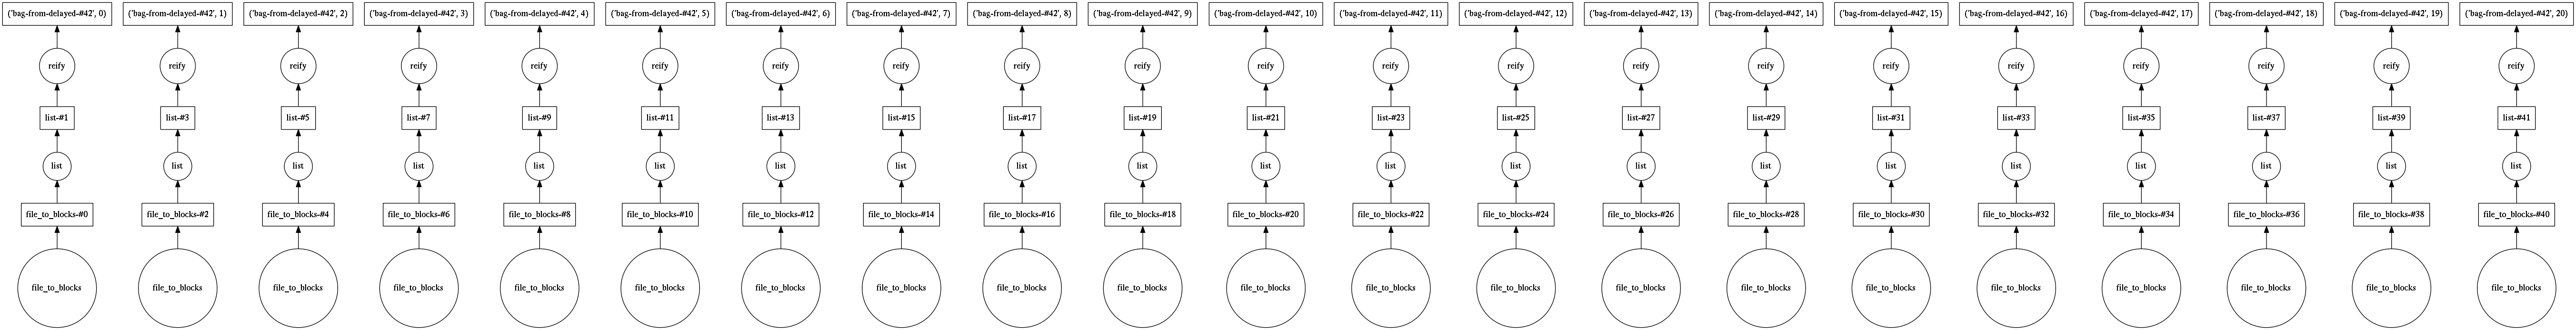

In [24]:
stocks.visualize()

In [26]:
import json
js = stocks.map(json.loads)

js.take(1)

({'timestamp': '2013-07-23 09:00:00',
  'close': 65.551,
  'high': 65.558,
  'low': 65.501,
  'open': 65.51},)

In [29]:
import os, sys
from glob import glob
import pandas as pd
import json

here = os.getcwd() # get the current directory
filenames = sorted(glob(os.path.join(here,'..','data', 'daily-stock', '*.json')))
filenames

['/home/navaro_p/big-data/notebooks/../data/daily-stock/aet.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/afl.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/aig.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/al.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/amgn.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/avy.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/b.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/bwa.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/ge.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/hal.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/hp.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/hpq.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/ibm.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/jbl.json',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/jpm.json',

In [30]:
from tqdm import tqdm_notebook as tqdm
for fn in tqdm(filenames):
    with open(fn) as f:
        data = [json.loads(line) for line in f]
        
    df = pd.DataFrame(data)
    
    out_filename = fn[:-5] + '.h5'
    df.to_hdf(out_filename, '/data')

In [32]:
filenames = sorted(glob(os.path.join(here,'..','data', 'daily-stock', '*.h5')))
filenames

['/home/navaro_p/big-data/notebooks/../data/daily-stock/aet.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/afl.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/aig.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/al.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/amgn.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/avy.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/b.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/bwa.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/ge.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/hal.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/hp.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/hpq.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/ibm.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/jbl.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/jpm.h5',
 '/home/navaro_p/big-data/not

In [33]:
series = {}
for fn in filenames:   # Simple map over filenames
    series[fn] = pd.read_hdf(fn)['close']

results = {}

for a in filenames:    # Doubly nested loop over the same collection
    for b in filenames:  
        if a != b:     # Filter out bad elements
            results[a, b] = series[a].corr(series[b])  # Apply function

((a, b), corr) = max(results.items(), key=lambda kv: kv[1])  # Reduction

In [34]:
a, b, corr

('/home/navaro_p/big-data/notebooks/../data/daily-stock/aet.h5',
 '/home/navaro_p/big-data/notebooks/../data/daily-stock/luv.h5',
 0.9413176064560878)

## Dask.bag methods

We can construct most of the above computation with the following Spark/Dask.bag methods:

*  `collection.map(function)`: apply function to each element in collection
*  `collection.product(collection)`: Create new collection with every pair of inputs
*  `collection.filter(predicate)`: Keep only elements of colleciton that match the predicate function
*  `collection.max()`: Compute maximum element


In [35]:
%%time

import dask.bag as db

b = db.from_sequence(filenames)
series = b.map(lambda fn: pd.read_hdf(fn)['close'])

corr = (series.product(series)
              .filter(lambda ab: not (ab[0] == ab[1]).all())
              .map(lambda ab: ab[0].corr(ab[1])).max())

CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 9.48 ms


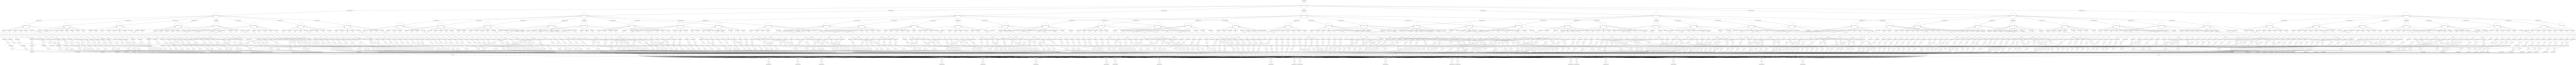

In [36]:
corr.visualize()

In [38]:
%%time

result = corr.compute()

CPU times: user 3.83 s, sys: 1.02 s, total: 4.85 s
Wall time: 15.8 s


In [39]:
result

0.9413176064560878

### Wordcount with Dask bag

In [42]:
import lorem

for i in range(20):
    with open(f"sample{i:02d}.txt","w") as f:
        f.write(lorem.text())

In [43]:
%ls *.txt

sample00.txt*  sample04.txt*  sample08.txt*  sample12.txt*  sample16.txt*
sample01.txt*  sample05.txt*  sample09.txt*  sample13.txt*  sample17.txt*
sample02.txt*  sample06.txt*  sample10.txt*  sample14.txt*  sample18.txt*
sample03.txt*  sample07.txt*  sample11.txt*  sample15.txt*  sample19.txt*


In [54]:
import dask.bag as db
import glob
b = db.read_text(glob.glob('sample*.txt'))

wordcount = (b.str.replace(".","")  # remve dots
             .str.lower()           # lower text
             .str.strip()           # remove \n and trailing spaces
             .str.split()           # split into words
             .flatten()             # chain all words lists
             .frequencies()         # compute occurences
             .topk(10, lambda x: x[1])) # sort and return top 10 words


wordcount.compute() # Run all tasks and return result

[('aliquam', 163),
 ('etincidunt', 160),
 ('porro', 156),
 ('consectetur', 153),
 ('quaerat', 152),
 ('est', 152),
 ('numquam', 150),
 ('ipsum', 149),
 ('neque', 149),
 ('quiquia', 148)]

## Genome example
We will use a Dask bag to calculate the frequencies of sequences of five bases, and then sort the sequences into descending order ranked by their frequency.

- First we will define some functions to split the bases into sequences of a certain size

### Exercise 9.1

- Implement a function `group_characters(line, n=5)` to group `n` characters together and create a sequence of 5 bases. `line` is a text line in genome.txt file.
    
- Implement `group_and_split(line)`
```py
>>> group_and_split('abcdefghijklmno')
['abcde', 'fghij', 'klmno']
```

- Use the dask bag to compute  the frequencies of sequences of five bases.

In [63]:
def group_character( line, n=5):
    bases = ''
    for i, b in enumerate(line):
        bases += b
        if (i+1) % n == 0:
            yield bases
            bases = ''

def group_and_split(line):
    return [ seq for seq in group_character(line)]


            
group_and_split('abcdefghijklmnox')        

['abcde', 'fghij', 'klmno']

In [25]:
import dask.bag as db
import glob
b = db.read_text('../data/genome.txt')

frequencies = (b.map(group_and_split)
             .flatten()             # chain all words lists
             .frequencies()         # compute occurences
             .topk(10, lambda x: x[1])) # sort and return top 10 words


frequencies.compute() # Run all tasks and return result

AttributeError: module 'dask.bag' has no attribute 'read'

### Exercise 9.2

The [FASTA](http://www.cbs.dtu.dk/services/NetGene2/fasta.php) file format is used to write several genome sequences.

- Create a function that can read a [FASTA file](../data/nucleotide-sample.txt) and compute the frequencies for n = 5 of a given sequence.

In [33]:
from itertools import groupby

with open('../data/nucleotide-sample.txt') as fh:
        
    lines = fh.readlines()
    
seq_names = filter(lambda line:line[0]=='>', lines)

sequences = {}
for seq_name in seq_names:
    print(seq_name)

>Seq1 [organism=Carpodacus mexicanus]

>Seq2 [organism=Vireo solitarius]

>Seq3 [organism=Dendroica tigrina]

>Seq4 [organism=Vireo gilvus]

>Seq5 [organism=Dendroica castanea]

>Seq6 [organism=Vireo gilvus]

>Seq7 [organism=Pelecanus erythrorhynchos]



>Seq1 [organism=Carpodacus mexicanus]
CCTTTATCTAATCTTTGGAGCATGAGCTGGCATAGTTGGAACCGCCCTCAGCCTCCTCATCCGTGCAGAA
>Seq2 [organism=Vireo solitarius]
GGTAGGTACCGCCCTAAGNCTCCTAATCCGAGCAGAACTANGCCAACCCGGAGCCCTTCTGGGAGACGAC
>Seq3 [organism=Dendroica tigrina]
CCTATACCTAATTTTCGGCGCATGAGCCGGAATGGTGGGTACCGCTCTAAGCCTCCTCATTCGAGCAGAA
>Seq4 [organism=Vireo gilvus]
CATGAGCTGGAATAGTAGGTACCGCCCTAAGCCTCCTAATTCGAGCAGAGCTAGGCCAACCCGGAGCCCT
>Seq5 [organism=Dendroica castanea]
CCTATACCTAATTTTCGGCGCATGAGCCGGAATAGTGGGTACCGCCCTAAGCCTCCTCATTCGAGCAGAA
>Seq6 [organism=Vireo gilvus]
CATGAGCTGGAATAGTAGGTACCGCCCTAAGCCTCCTAATTCGAGCAGAGCTAGGCCAACCCGGAGCCCT
>Seq7 [organism=Pelecanus erythrorhynchos]
TAGTTGGAACAGCCCTCAGCCTACTCATCCGAGCAGAACTAGGCCAACCCGGAACCCTCCTGGGAGATGA


In [5]:
   
    for header in faiter:
        # drop the ">"
        headerStr = header.__next__()[1:].strip()
    
    # join all sequence lines to one.
    seq = "".join(s.strip() for s in faiter.__next__())
    
    yield (headerStr, seq)
    
fiter = fasta_iter()
    
for ff in fiter:
    headerStr, seq = ff
    print(ff)

/opt/miniconda3/envs/big-data/lib/python3.6/site-packages/ipykernel_launcher.py:30: DeprecationWarning: generator 'fasta_iter' raised StopIteration


# Some remarks about bag

*  Higher level dask collections include functions for common patterns
*  Move data to collection, construct lazy computation, trigger at the end
*  Use Dask.bag (`product + map`) to handle nested for loop

Bags have the following known limitations

1.  Bag operations tend to be slower than array/dataframe computations in the
    same way that Python tends to be slower than NumPy/Pandas
2.  ``Bag.groupby`` is slow.  You should try to use ``Bag.foldby`` if possible.
    
3. Check the [API](http://dask.pydata.org/en/latest/bag-api.html) 

4. `dask.dataframe` can be faster than `dask.bag`.  But sometimes it is easier to load and clean messy data with a bag. We will see later how to transform a bag into a `dask.dataframe` with the [to_dataframe](http://dask.pydata.org/en/latest/bag-api.html#dask.bag.Bag.to_dataframe) method.